In [1]:
import pandas as pd

In [2]:
final_prostate_data = pd.read_csv("final_prostate_data.csv")

In [3]:
def convert_to_categorical(df):
    """
    Convert selected columns in a DataFrame to categorical columns if they meet the following criteria:
    - Have 14 or fewer unique numbers.
    - All non-NaN values are whole numbers without any decimals.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.

    Returns:
    pandas.DataFrame: The DataFrame with selected columns converted to categorical.
    """
    for column in df.columns:
        unique_values = df[column].dropna().unique()  # Exclude NaN values
        
        # Check if the column has 14 or fewer unique values
        if len(unique_values) <= 14:
            
            # Check if all non-NaN values are whole numbers without decimals
            if all(value == int(value) and value % 1 == 0 for value in unique_values):
                
                # Convert the column to categorical
                df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')
                df[column] = df[column].astype('category')
    
    return df

def filter_non_categorical_columns(df):
    """
    Filters out all non-categorical columns from a pandas DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: A new DataFrame containing only the non-categorical columns.
    """
    non_categorical_columns = df.select_dtypes(exclude='category').columns
    return df[non_categorical_columns]


In [4]:
# Selecting a subset of features for modeling
selected_features = final_prostate_data.columns[:39]
target_column_name = "PROSTCAN_A"  

# Subset the data
X = final_prostate_data[selected_features]
y = final_prostate_data[target_column_name]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Creating transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, and transform the testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [6]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy of replacing missing values with the mean
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to your training data
X_train = imputer.fit_transform(X_train)


C:\Users\HP 10th Gen\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [7]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy of replacing missing values with the mean
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to your training data
X_test = imputer.fit_transform(X_test)


C:\Users\HP 10th Gen\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [8]:
import numpy as np

# Replace inf/-inf with NaN
X_train = np.where(np.isinf(X_train), np.nan, X_train)

# Then you can apply the imputer (as shown above) to handle these NaN values
X_train = imputer.fit_transform(X_train)

C:\Users\HP 10th Gen\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to generate synthetic samples for minority class
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [10]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model
log_reg_model.fit(X_train, y_train)

C:\Users\HP 10th Gen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
# Assuming your logistic regression model is named log_reg_model
y_train_pred = log_reg_model.predict(X_train)
from sklearn.metrics import classification_report

# Generate and print the classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      4198
         2.0       1.00      1.00      1.00      4198
         7.0       1.00      1.00      1.00      4198
         9.0       1.00      1.00      1.00      4198

    accuracy                           1.00     16792
   macro avg       1.00      1.00      1.00     16792
weighted avg       1.00      1.00      1.00     16792



In [12]:
# Assuming you have a test set ready (X_test)
y_pred = log_reg_model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9993293091884641
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       439
         2.0       1.00      1.00      1.00      1039
         7.0       0.67      1.00      0.80         2
         9.0       1.00      0.91      0.95        11

    accuracy                           1.00      1491
   macro avg       0.92      0.98      0.94      1491
weighted avg       1.00      1.00      1.00      1491

Confusion Matrix:
 [[ 439    0    0    0]
 [   0 1039    0    0]
 [   0    0    2    0]
 [   0    0    1   10]]


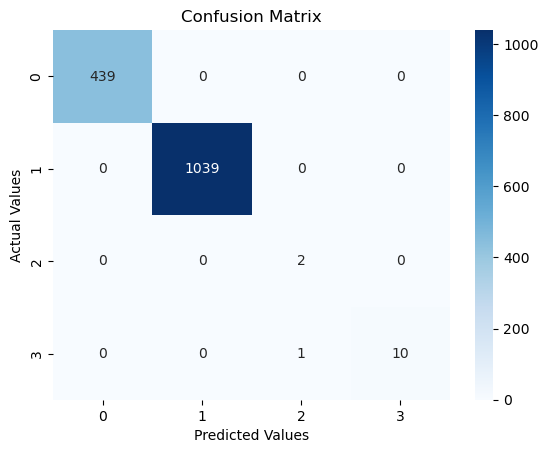

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()